In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
!pip install tensorflow keras opencv-python matplotlib scikit-learn

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import cv2

In [ ]:
# Define paths to dataset directories
with_mask_dir = "/content/drive/MyDrive/Face Mask Detection/WithMask"
without_mask_dir = "/content/drive/MyDrive/Face Mask Detection/WithoutMask"

In [ ]:
# Load images and labels
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resize images to 128x128
            images.append(img)
            labels.append(label)
    return images, labels

In [ ]:
# Load images for each class
with_mask_images, with_mask_labels = load_images_from_folder(with_mask_dir, 0)
without_mask_images, without_mask_labels = load_images_from_folder(without_mask_dir, 1)

In [ ]:
# datasets
images = np.array(with_mask_images + without_mask_images)
labels = np.array(with_mask_labels + without_mask_labels)

In [ ]:
# Normalize the images
images = images / 255.0

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
# Reshape labels
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Fully Connected Layer 2
model.add(Dense(64, activation='relu'))

# Output Layer (3 classes: with mask, without mask, improperly worn)
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5277 - loss: 0.8867 - val_accuracy: 0.8375 - val_loss: 0.4774
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8169 - loss: 0.4713 - val_accuracy: 0.8625 - val_loss: 0.3652
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8733 - loss: 0.3804 - val_accuracy: 0.9125 - val_loss: 0.2640
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8852 - loss: 0.2828 - val_accuracy: 0.9250 - val_loss: 0.2421
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9494 - loss: 0.1825 - val_accuracy: 0.8875 - val_loss: 0.2528
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9532 - loss: 0.1653 - val_accuracy: 0.9250 - val_loss: 0.2207
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9444 - loss: 0.2003 - val_accuracy: 0.9250 - val_loss: 0.2953
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 963ms/step - accuracy: 0.9422 - loss: 0.1939 - val_accuracy: 0.9500 - val_lo

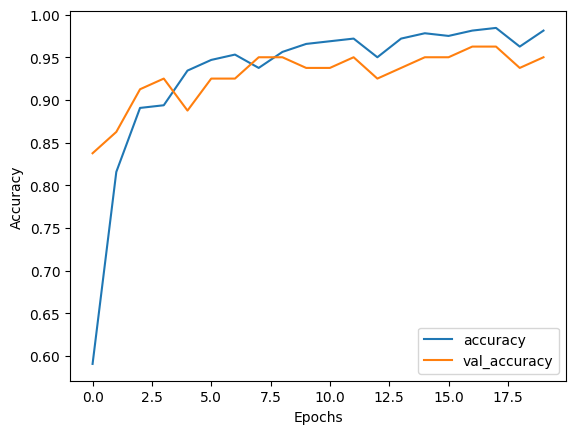

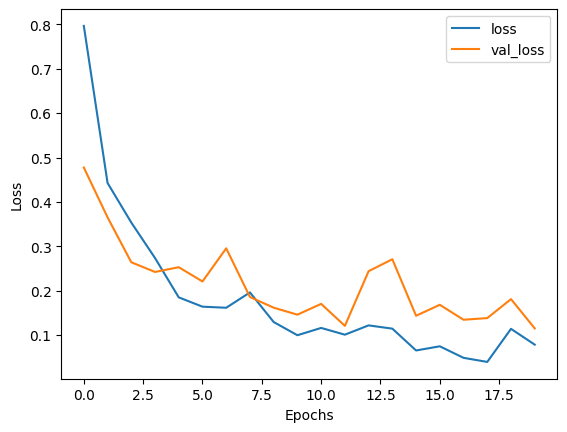

In [ ]:
# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step - accuracy: 0.9398 - loss: 0.1370
Test Loss: 0.11495904624462128
Test Accuracy: 95.00%


In [ ]:
# Classification report and confusion matrix
print(classification_report(y_test, y_pred_classes, target_names=['with_mask', 'without_mask']))
print(confusion_matrix(y_test, y_pred_classes))

              precision    recall  f1-score   support

   with_mask       0.98      0.93      0.95        44
without_mask       0.92      0.97      0.95        36

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80

[[41  3]
 [ 1 35]]


In [ ]:
# Save the trained model
model.save("face_mask_detector_model.h5")